In [2]:
"""
第三讲:常用数据可视化方法
（1）柱状图 error bar
（2）直方图
（3）箱线图
（4）散点图
（5）相关性热图
"""
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
iris=pandas.read_csv('iris.csv')

In [ ]:
iris.sample(10)#随机抽10个样本

In [ ]:
iris.describe()#统计参数的取值范围

In [ ]:
iris.info()

In [ ]:
iris.head()

In [ ]:
iris.tail()

In [ ]:
iris.loc[0:3]

In [ ]:
iris['species']

In [ ]:
seaborn.countplot(x='species',data=iris) #统计个数

In [ ]:
seaborn.barplot(x='species',y='petal_length',data=iris,errorbar='sd',color='green') #柱状图，x，y，data，errorbar

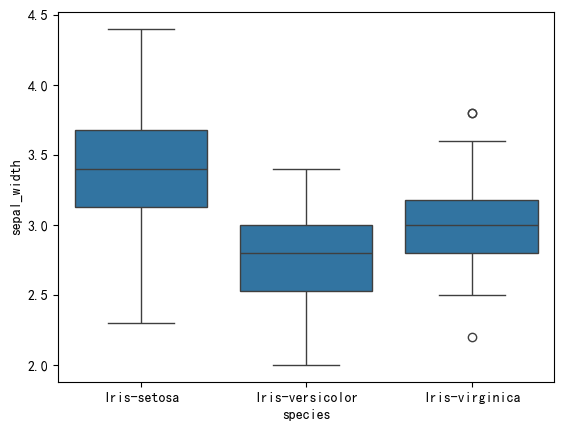

In [3]:
def Boxplot(Y):
    seaborn.boxplot(x='species',y=Y,data=iris)
    return
Boxplot('sepal_width')

In [ ]:
seaborn.histplot(iris,x='sepal_length')

In [ ]:
seaborn.displot(iris,x='sepal_length',stat='density')

In [ ]:
seaborn.displot(iris,x='sepal_length',stat='density',kde=True,color='green',edgecolor='black',rug=True)

In [6]:
seaborn.set_style("darkgrid", {"axes.facecolor": "#f0f0f0"})

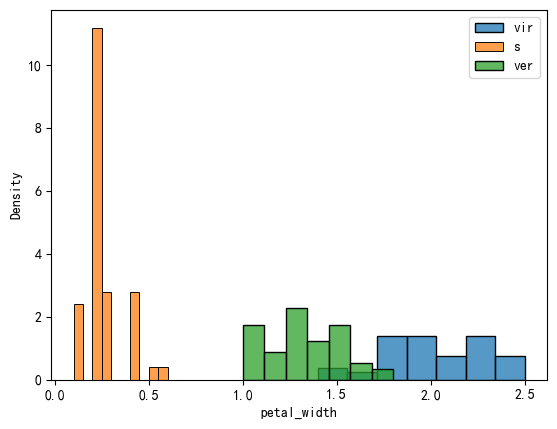

In [2]:
iris_vir = iris[iris.species == 'Iris-virginica']
iris_s= iris[iris.species == 'Iris-setosa']
iris_ver = iris[iris.species == 'Iris-versicolor']
seaborn.histplot(iris_vir['petal_width'],stat='density', label='vir') 
seaborn.histplot(iris_s['petal_width'],stat='density',label='s')
seaborn.histplot(iris_ver['petal_width'],stat='density',label='ver').legend()


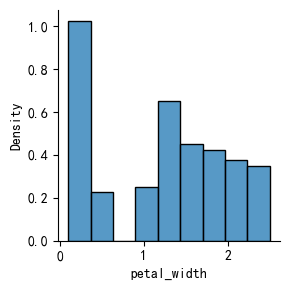

In [6]:
"""
FacetGrid是seaborn库中的一种方法。
它画图时可以有多个坐标轴，轴的变量相同。
需要事先指定画图数据集和作图方案
作图方案（作图框的操作）：
总体数据画在一张图上展示（不加参数）
三个类别分别作图，并分配不同的配色方案,默认放在一张图上展示(hue),可与row和col联用。
按行画三张图(row)
按列画三张图(col)
"""

g = seaborn.FacetGrid(iris)
g.map(seaborn.histplot,'petal_width',stat='density')


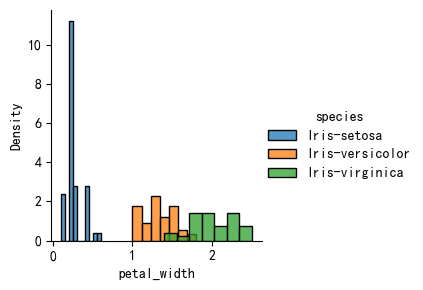

In [5]:
g = seaborn.FacetGrid(iris,hue='species')
g.map(seaborn.histplot,'petal_width',stat='density').add_legend()

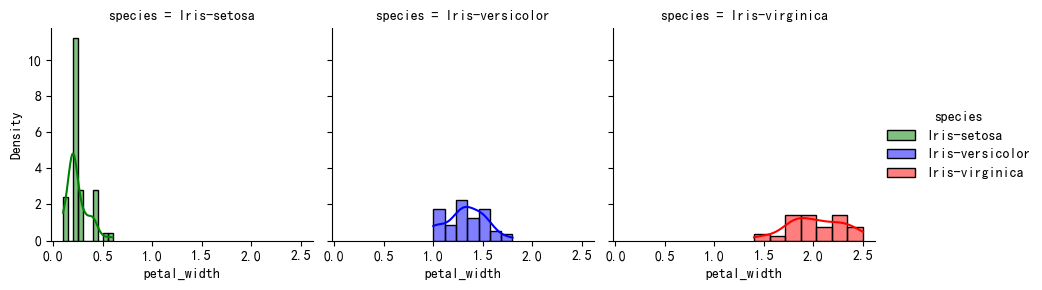

In [4]:
g = seaborn.FacetGrid(iris,col='species',hue='species',palette={'Iris-setosa':'green',
                                                  'Iris-versicolor':'blue',
                                                  'Iris-virginica':'red'})
g.map(seaborn.histplot,'petal_width',stat='density',kde=True).add_legend()

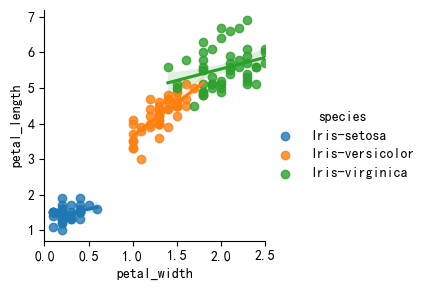

In [3]:
g = seaborn.FacetGrid(iris,hue='species')
g.set(xlim=(0,2.5)) #问题：y轴如何设置?
g.map(seaborn.regplot,'petal_width','petal_length') .add_legend()


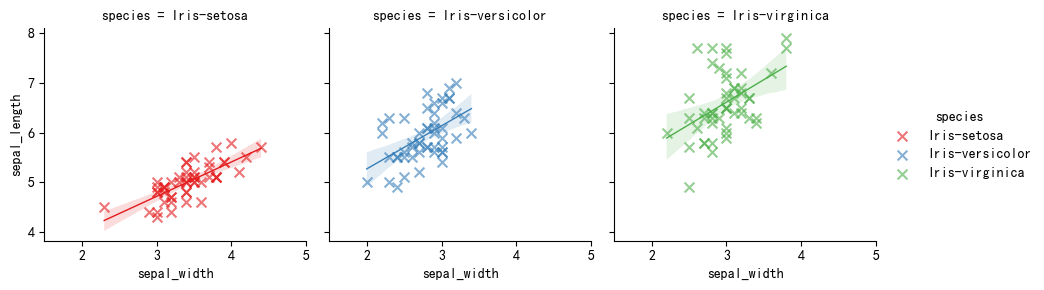

In [4]:
g = seaborn.FacetGrid(iris,col='species',hue='species',palette='Set1')
g.set(xlim=(1.5,5))
g.map(seaborn.regplot,'sepal_width','sepal_length',marker='x',scatter_kws={'s': 50, 'alpha': 0.6},line_kws={'linewidth': 1, 'linestyle': '-'}).add_legend()


<Axes: >

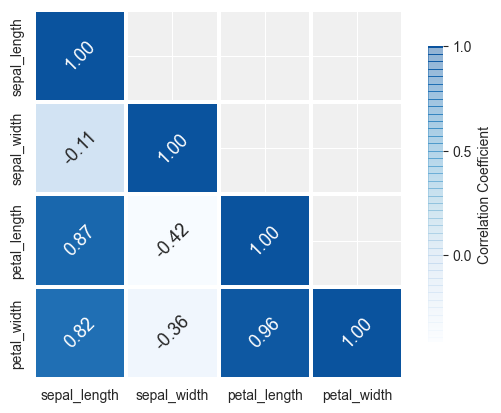

In [7]:
Iris=iris.drop('id',axis=1).drop('species',axis=1)
mask = np.triu(np.ones_like(Iris.corr(),dtype=bool),k=1)
seaborn.heatmap(Iris.corr(),mask=mask,cmap='Blues',
                center=0.4,
                linewidth=1.5,
                linecolor='white',
                square=True,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 13, 'rotation': 45, 'ha': 'center', 'va': 'center'},
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient', 'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1], 'drawedges': True}
                )
